In [1]:
from util.VisualizeDataset import VisualizeDataset
from Chapter3.DataTransformation import LowPassFilter
from Chapter3.DataTransformation import PrincipalComponentAnalysis
from Chapter3.ImputationMissingValues import ImputationMissingValues
from Chapter3.KalmanFilters import KalmanFilters
from scipy.signal import argrelextrema
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
# Let is create our visualization class again.
DataViz = VisualizeDataset()

dataset_path = 'intermediate_datafiles/'
try:
    dataset = pd.read_csv(dataset_path + 'all_data_converted.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e
    
dataset.index = pd.to_datetime(dataset.index, format='%Y-%m-%d %H:%M:%S.%f'[:-3])
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

In [3]:
# creating sum of squares attributes from accelerometer and gyroscope data
acc_r = (dataset['acc_x']**2+dataset['acc_y']**2+dataset['acc_z']**2)
gyr_r = (dataset['gyr_x']**2+dataset['gyr_y']**2+dataset['gyr_z']**2)
dataset['acc_r'] = np.sqrt(acc_r)
dataset['gyr_r'] = np.sqrt(gyr_r)

In [4]:
#split the dataset into the seperate exercises
squat = dataset[(dataset.labelSquat == 1)]
bench = dataset[(dataset.labelBenchPress == 1)]
ohp = dataset[(dataset.labelOHP == 1)]
deadlift = dataset[(dataset.labelDeadlift == 1)]
row = dataset[(dataset.labelRow == 1)]

In [13]:
# Determine the sampling frequency.
LowPass = LowPassFilter()
fs = float(1000)/milliseconds_per_instance

In [39]:
def count_reps_bench(data, cutoff=0.4):
    data = LowPass.low_pass_filter(data, 'acc_r', fs, cutoff, order=10)
    indexes = argrelextrema(data['acc_r_lowpass'].values, np.greater) 
    peaks = data.iloc[indexes]
    print len(peaks)
    
    fig, ax = plot.subplots(figsize=(8,6))
    plot.plot(data['acc_r_lowpass'])
    plot.plot(peaks['acc_r_lowpass'], 'o', color='red')
    ax.set_ylabel('acc_r_lowpass')
    plot.show   

In [71]:
def count_reps_squat(data, cutoff=0.4):
    data = LowPass.low_pass_filter(data, 'acc_r', fs, cutoff, order=10)
    indexes = argrelextrema(data['acc_r_lowpass'].values, np.greater) 
    peaks = data.iloc[indexes]
    print len(peaks)
    
    fig, ax = plot.subplots(figsize=(8,6))
    plot.plot(data['acc_r_lowpass'])
    plot.plot(peaks['acc_r_lowpass'], 'o', color='red')
    ax.set_ylabel('acc_r_lowpass')
    plot.show   

In [46]:
def count_reps_row(data, cutoff=0.6):
    data = LowPass.low_pass_filter(data, 'gyr_x', fs, cutoff, order=10)
    indexes = argrelextrema(data['gyr_x_lowpass'].values, np.greater) 
    peaks = data.iloc[indexes]
    print len(peaks)
    
    fig, ax = plot.subplots(figsize=(8,6))
    plot.plot(data['gyr_x_lowpass'])
    plot.plot(peaks['gyr_x_lowpass'], 'o', color='red')
    ax.set_ylabel('gyr_x_lowpass')
    plot.show   

In [56]:
def count_reps_ohp(data, cutoff=0.4):
    data = LowPass.low_pass_filter(data, 'acc_r', fs, cutoff, order=10)
    indexes = argrelextrema(data['acc_r_lowpass'].values, np.less) 
    peaks = data.iloc[indexes]
    print len(peaks)
    
    fig, ax = plot.subplots(figsize=(8,6))
    plot.plot(data['acc_r_lowpass'])
    plot.plot(peaks['acc_r_lowpass'], 'o', color='red')
    ax.set_ylabel('acc_r_lowpass')
    plot.show   

In [48]:
def count_reps_dead(data, cutoff=0.4):
    #apply lowpass filter with a cut off at 0.4Hz
    data = LowPass.low_pass_filter(data, 'acc_r', fs, cutoff, order=10)
    indexes = argrelextrema(data['acc_r_lowpass'].values, np.less) 
    peaks = data.iloc[indexes]
    print len(peaks)
    
    fig, ax = plot.subplots(figsize=(8,6))
    plot.plot(data['acc_r_lowpass'])
    plot.plot(peaks['acc_r_lowpass'], 'o', color='red')
    ax.set_ylabel('acc_r_lowpass')
    plot.show   

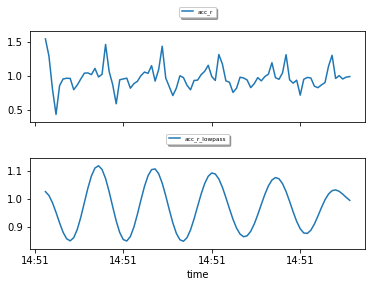

5


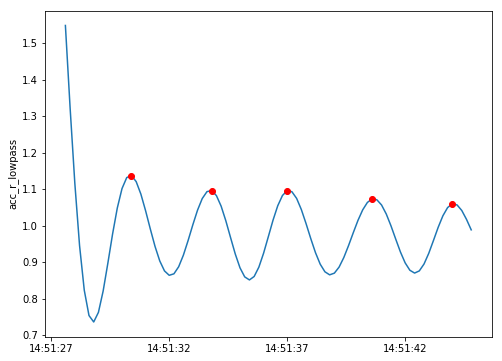

In [61]:
new_dataset = LowPass.low_pass_filter(copy.deepcopy(bench), 'acc_r', fs, cutoff, order=10)
single_set = new_dataset[new_dataset['set'] == new_dataset['set'].unique()[3]]
DataViz.plot_dataset(single_set, ['acc_r', 'acc_r_lowpass'], ['exact','exact'], ['line', 'line'])
count_reps_acc(single_set)

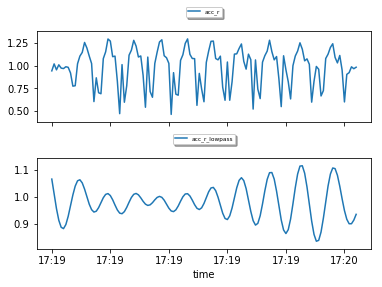

10


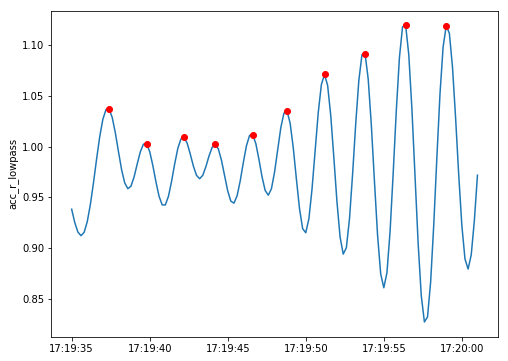

In [41]:
new_dataset = LowPass.low_pass_filter(copy.deepcopy(squat), 'acc_r', fs, cutoff, order=10)
single_set = new_dataset[new_dataset['set'] == new_dataset['set'].unique()[3]]
DataViz.plot_dataset(single_set, ['acc_r', 'acc_r_lowpass'], ['exact','exact'], ['line', 'line'])
count_reps_acc(single_set)

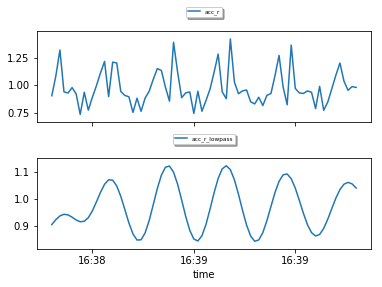

5


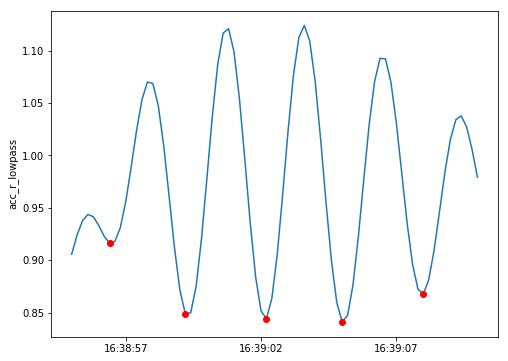

In [60]:
new_dataset = LowPass.low_pass_filter(copy.deepcopy(ohp), 'acc_r', fs, cutoff, order=10)
single_set = new_dataset[new_dataset['set'] == new_dataset['set'].unique()[0]]
DataViz.plot_dataset(single_set, ['acc_r', 'acc_r_lowpass'], ['exact','exact'], ['line', 'line'])
count_reps_ohp(single_set)

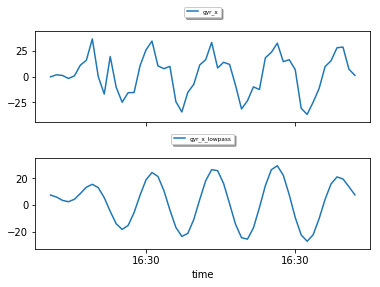

5


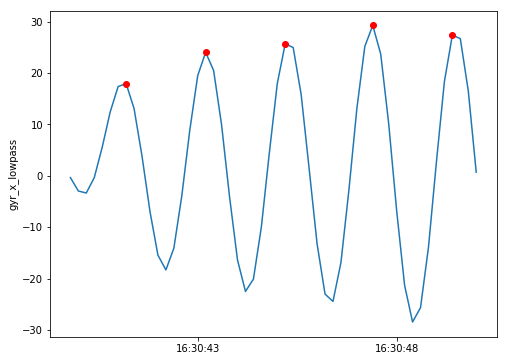

In [47]:
new_dataset = LowPass.low_pass_filter(copy.deepcopy(row), 'gyr_x', fs, 0.6, order=10)
single_set = new_dataset[new_dataset['set'] == new_dataset['set'].unique()[3]]
DataViz.plot_dataset(single_set, ['gyr_x', 'gyr_x_lowpass'], ['exact','exact'], ['line', 'line'])
count_reps_row(single_set)

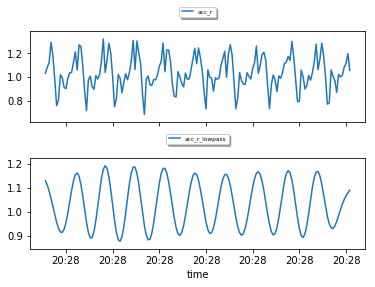

10


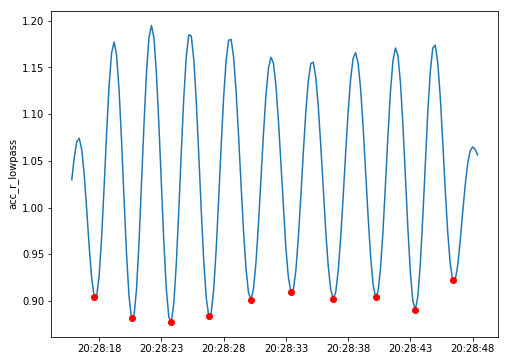

In [53]:
new_dataset = LowPass.low_pass_filter(copy.deepcopy(deadlift), 'acc_r', fs, cutoff, order=10)
single_set = new_dataset[new_dataset['set'] == new_dataset['set'].unique()[2]]
DataViz.plot_dataset(single_set, ['acc_r', 'acc_r_lowpass'], ['exact','exact'], ['line', 'line'])
count_reps_dead(single_set)

bench = acc_r, 0,4
squat = acc_r, 0.4
row = gyr_x, 0.6


6
7
10
10
4
5
5
6
5
5
11
9
5


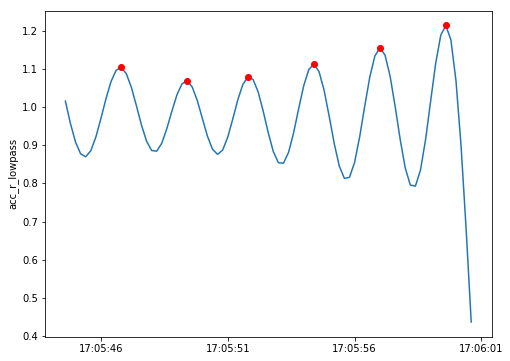

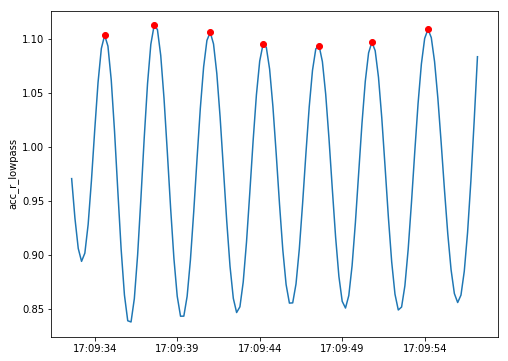

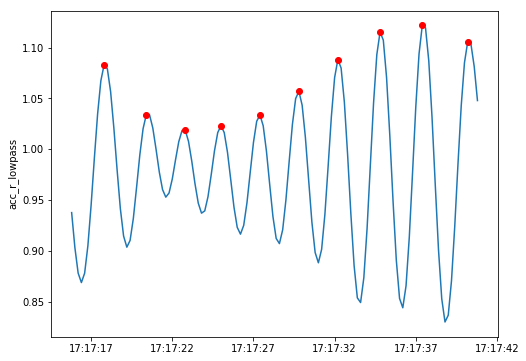

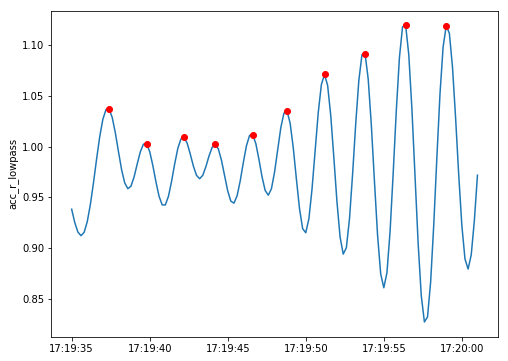

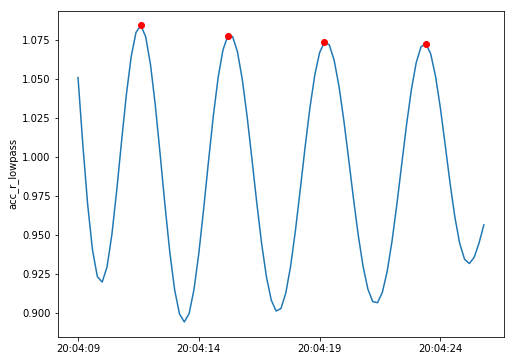

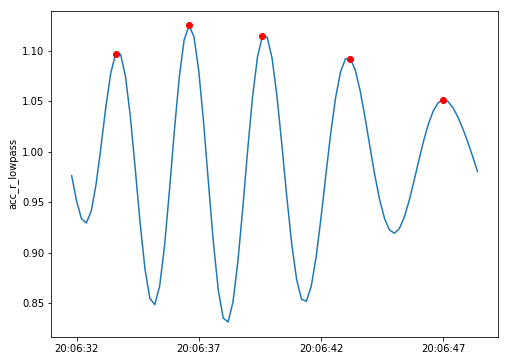

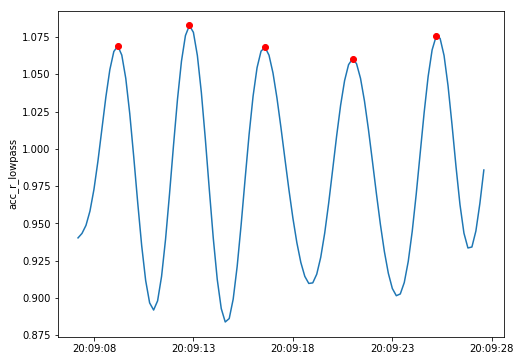

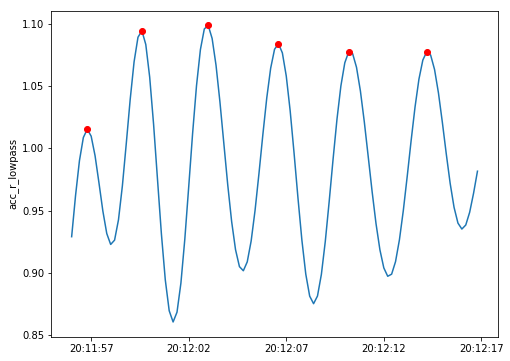

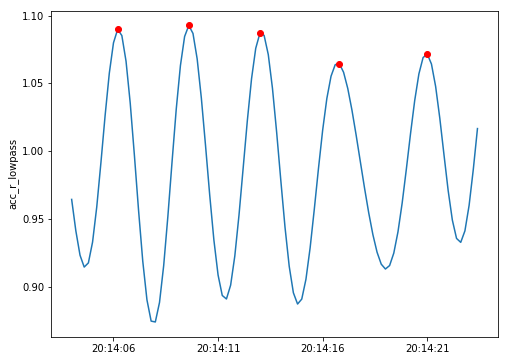

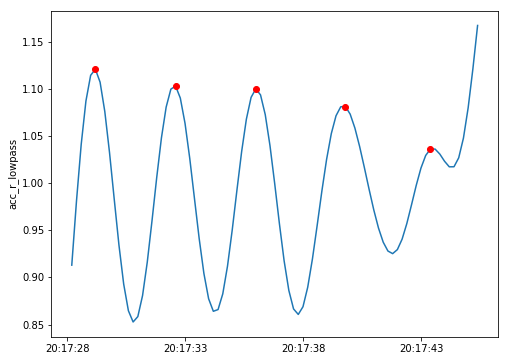

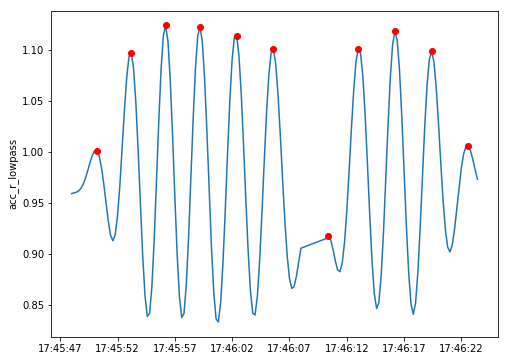

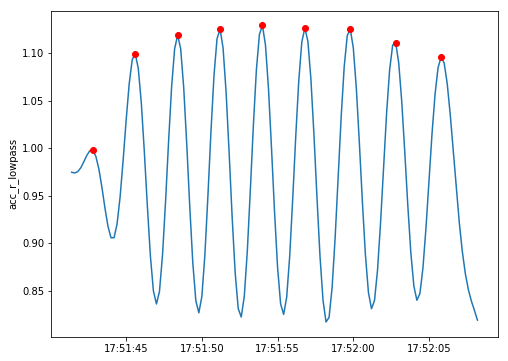

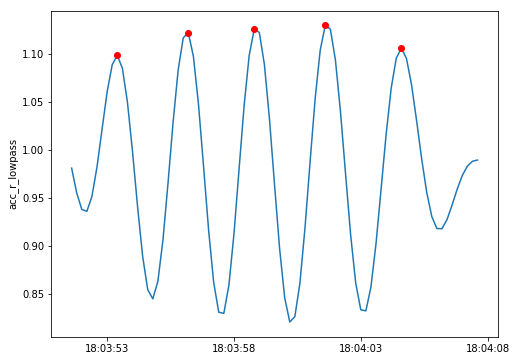

In [64]:
exercise = squat
for sets in range (len(exercise.set.unique())):
    data = exercise[exercise.set == exercise.set.unique()[sets]]
    count_reps_squat(data)

5
5
5
5
5
8
5
5
5
5
10
11
10


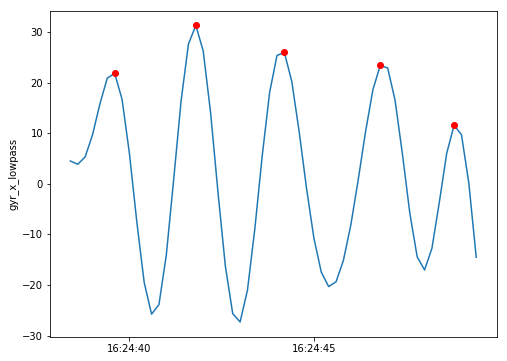

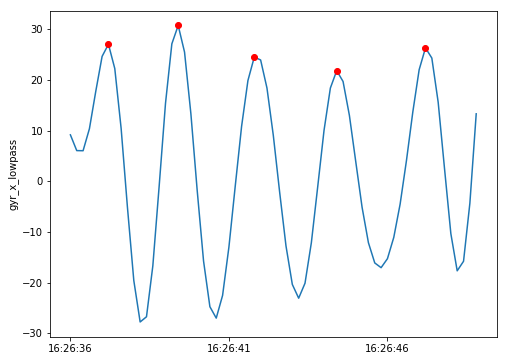

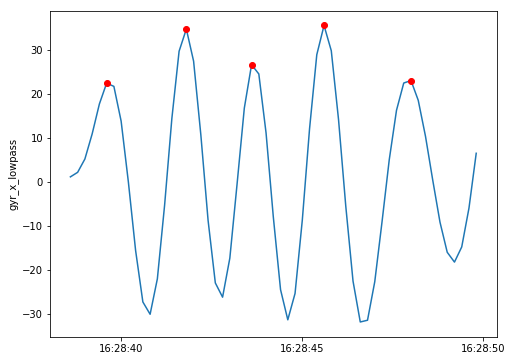

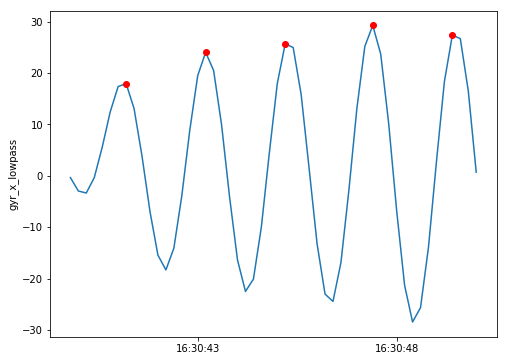

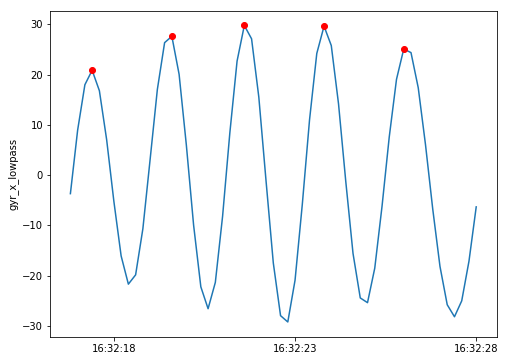

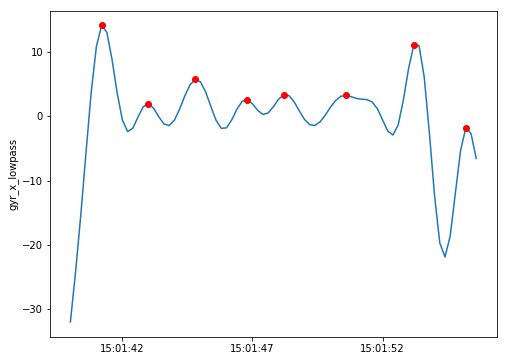

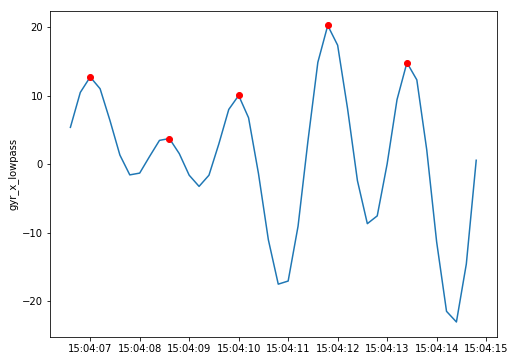

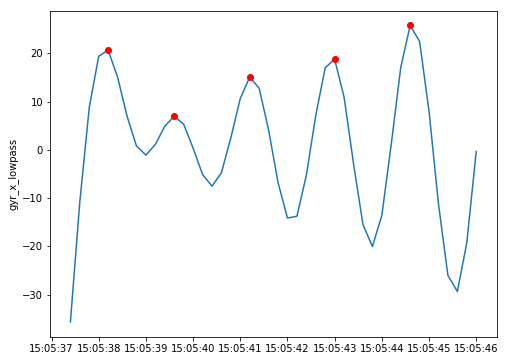

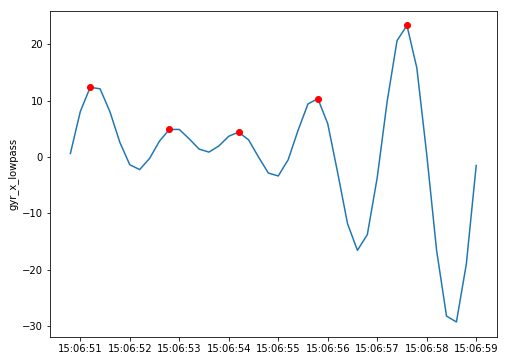

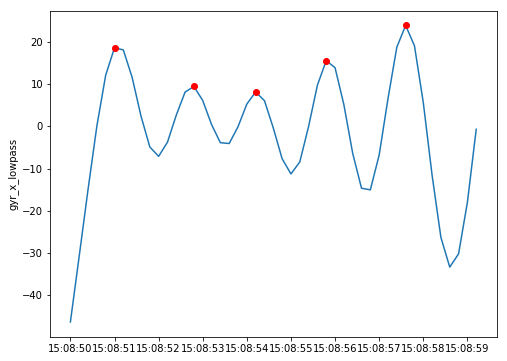

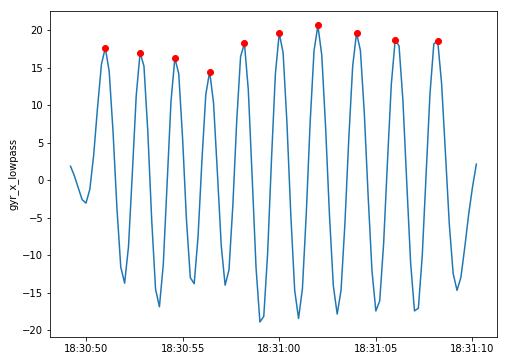

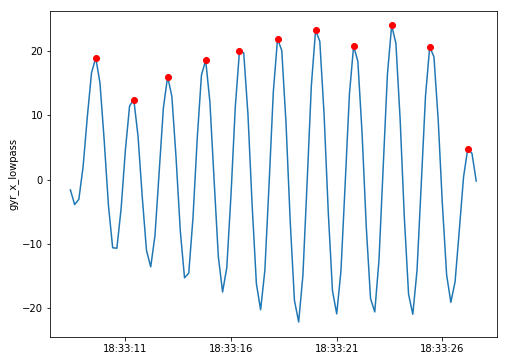

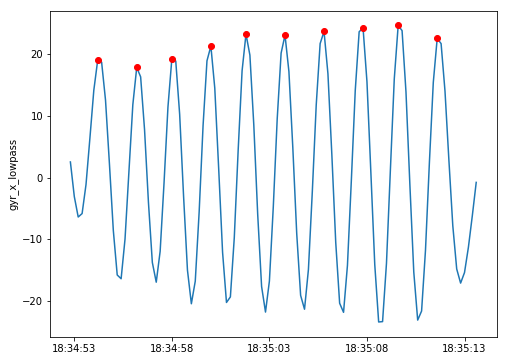

In [65]:
exercise = row
for sets in range (len(exercise.set.unique())):
    data = exercise[exercise.set == exercise.set.unique()[sets]]
    count_reps_row(data)

10
10
10
11
10
5
10


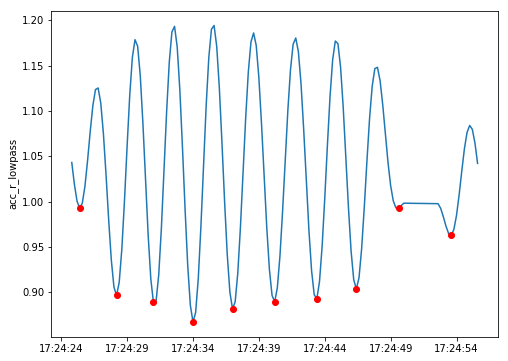

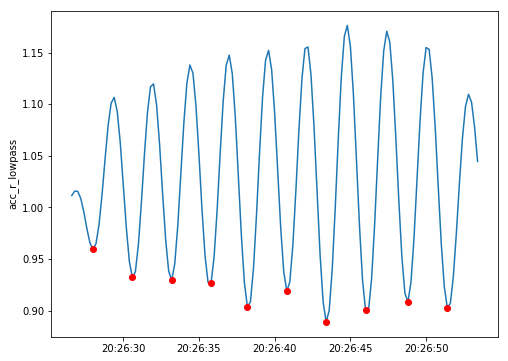

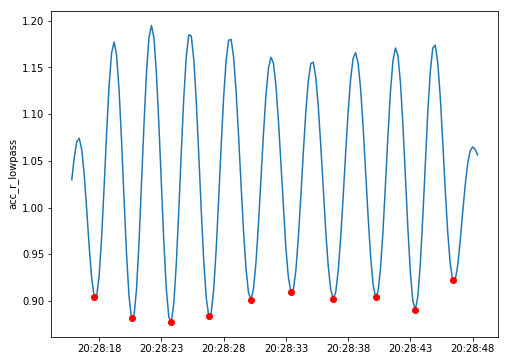

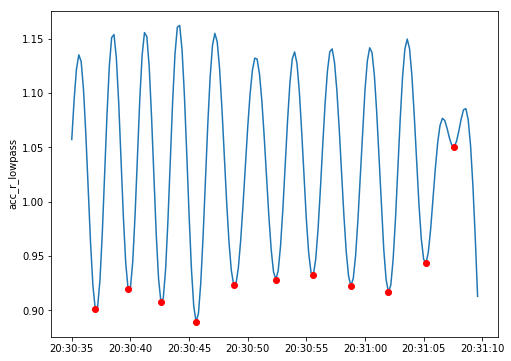

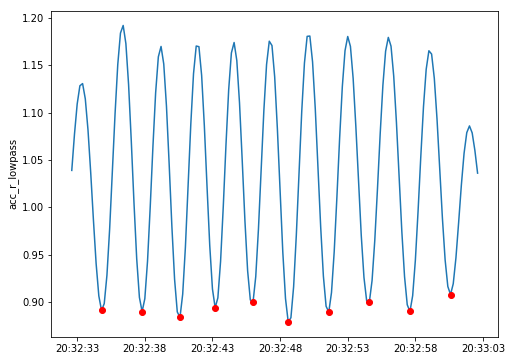

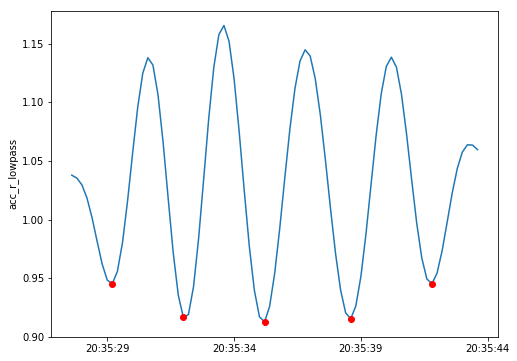

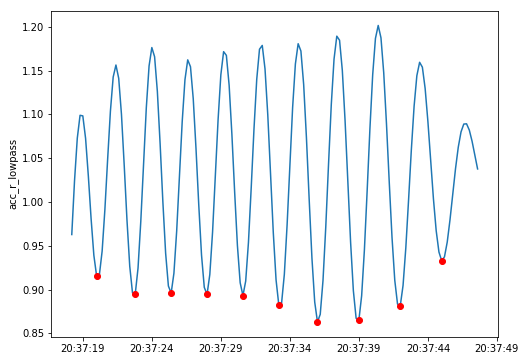

In [68]:
exercise = deadlift
for sets in range (len(exercise.set.unique())):
    data = exercise[exercise.set == exercise.set.unique()[sets]]
    count_reps_dead(data)

5
5
5
5
5
4
5
5
5
9
10
8


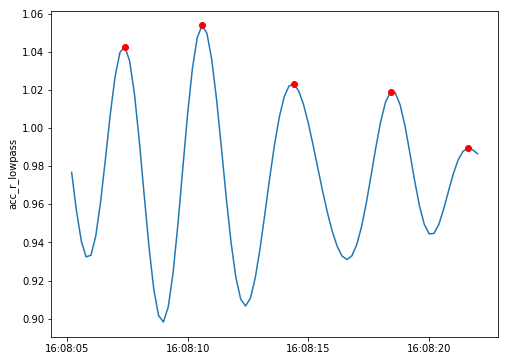

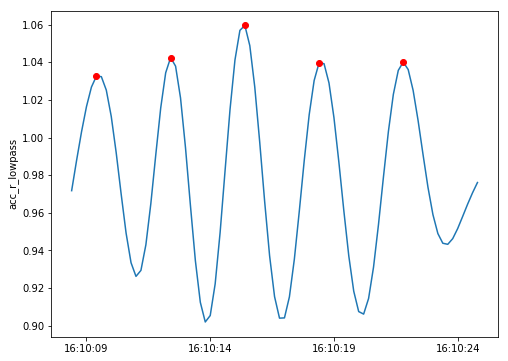

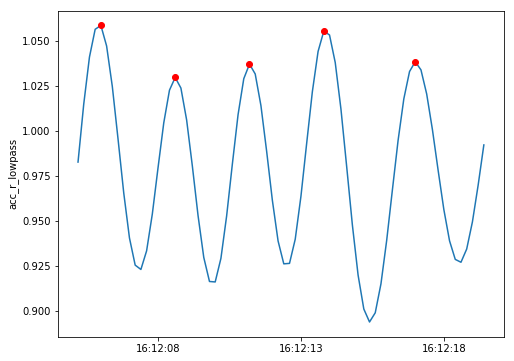

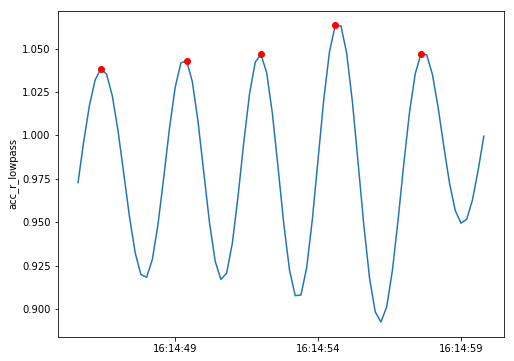

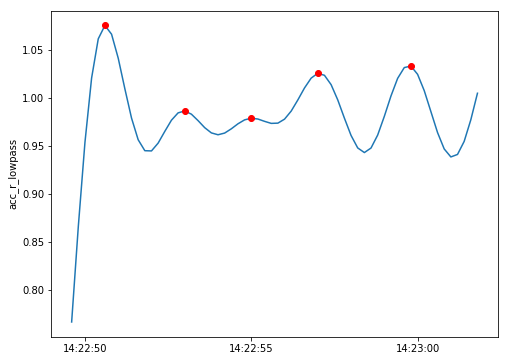

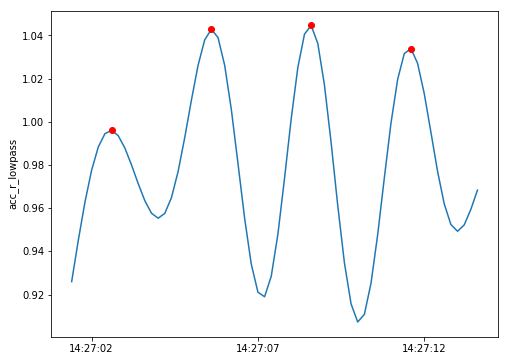

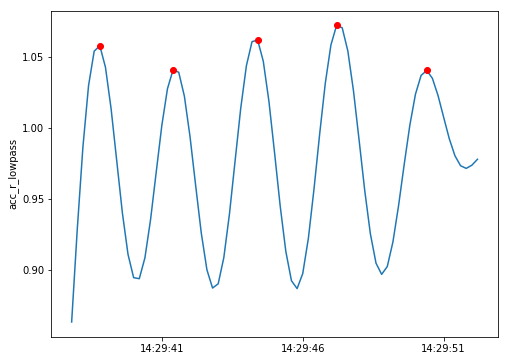

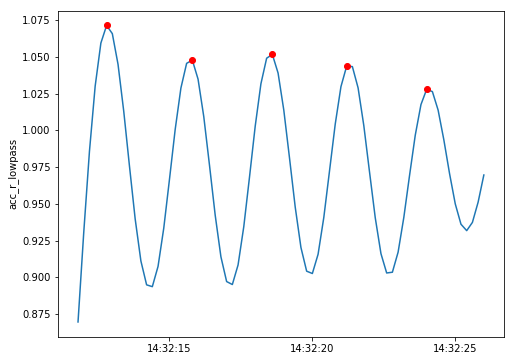

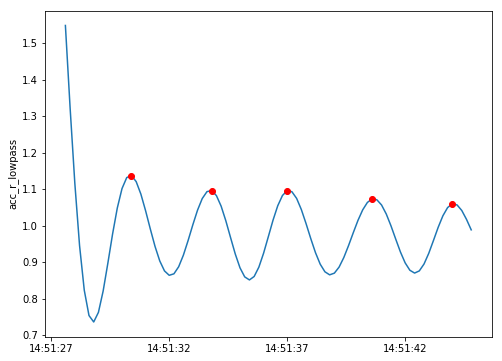

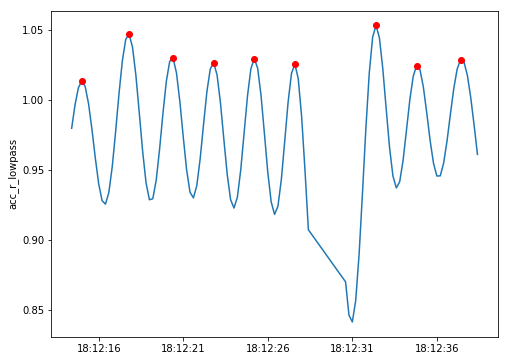

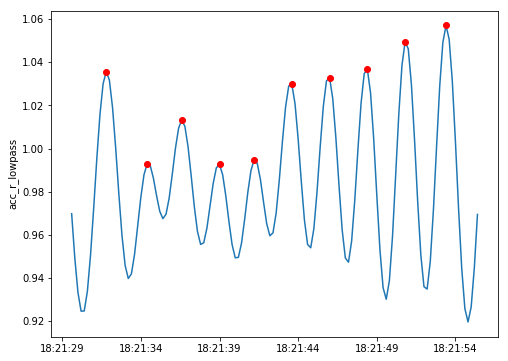

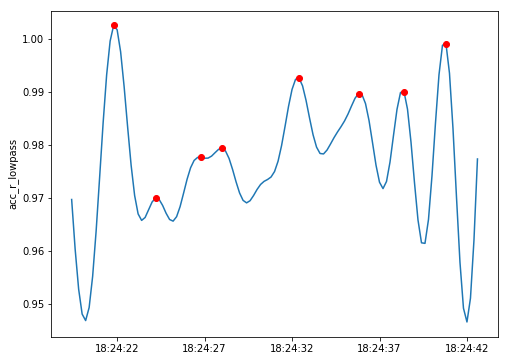

In [69]:
exercise = bench
for sets in range (len(exercise.set.unique())):
    data = exercise[exercise.set == exercise.set.unique()[sets]]
    count_reps_bench(data)

5
5
4
5
5
5
8
9
10
7
6
7
5
5
5
5
5


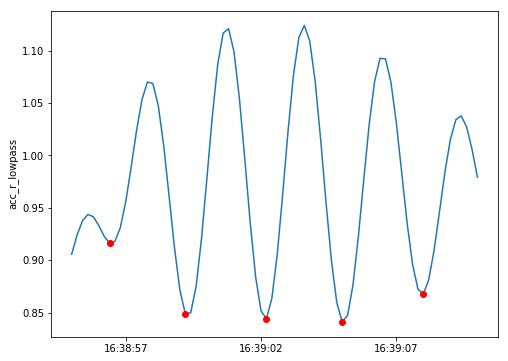

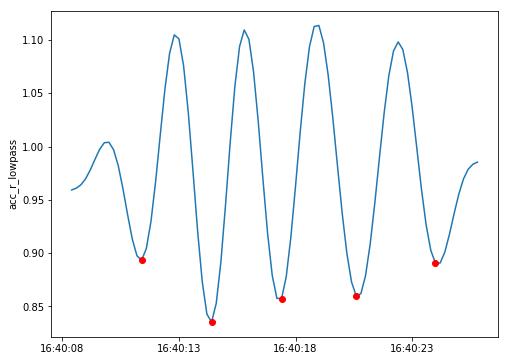

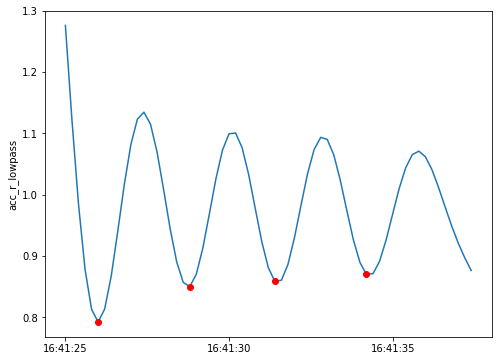

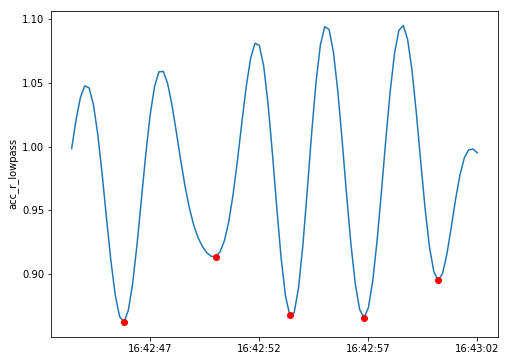

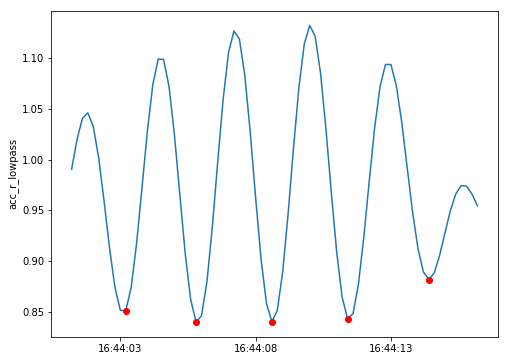

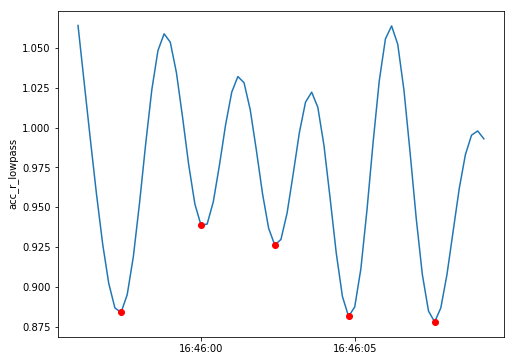

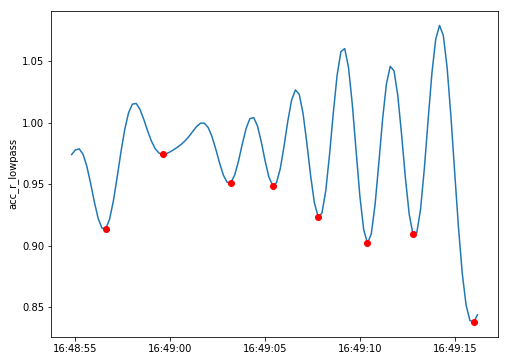

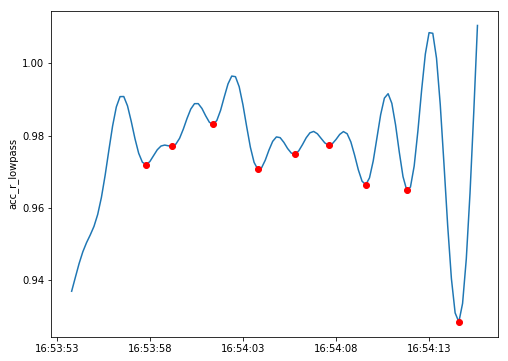

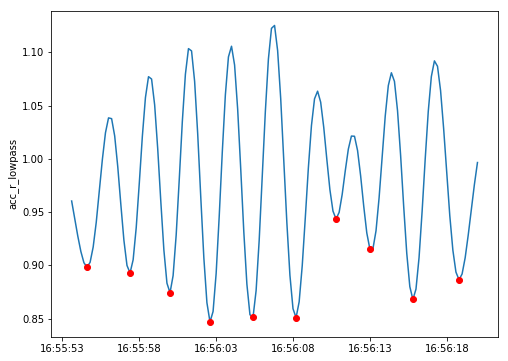

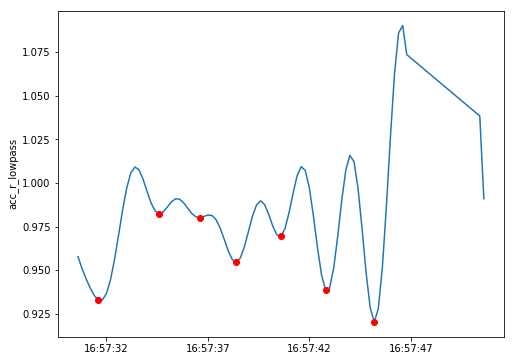

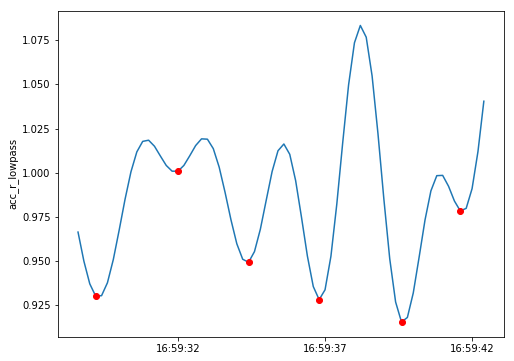

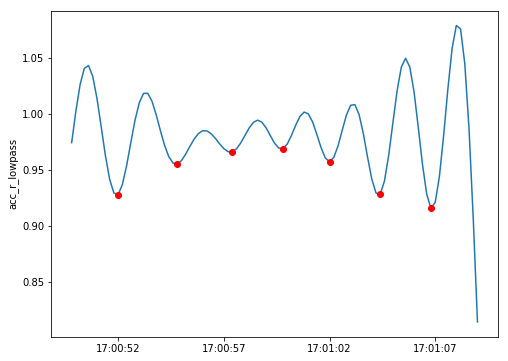

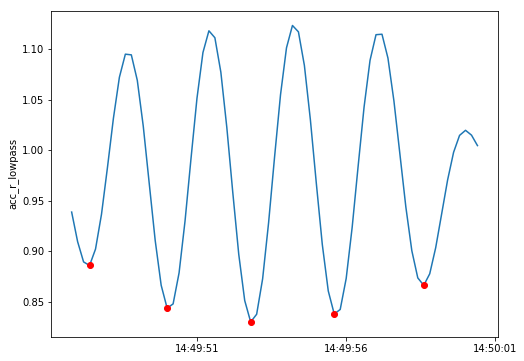

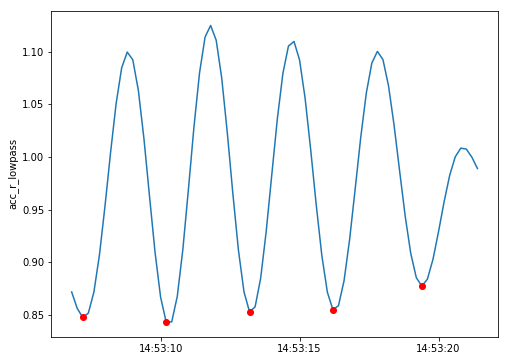

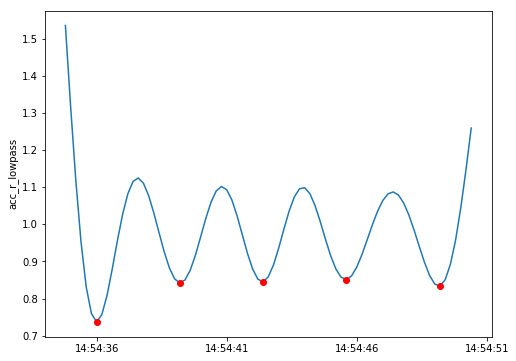

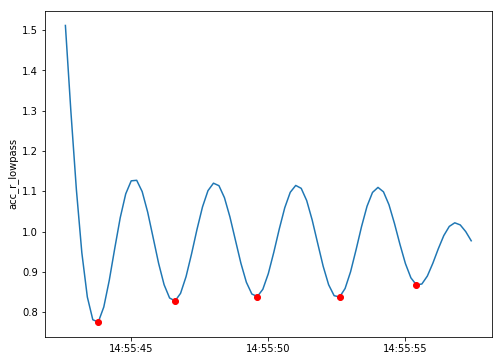

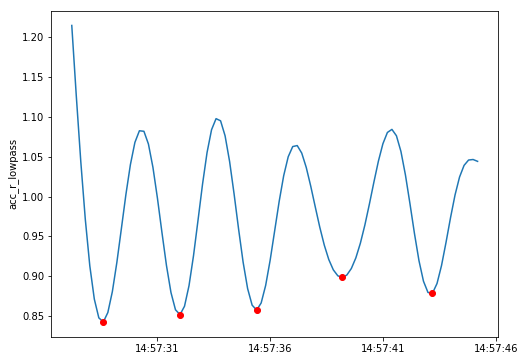

In [70]:
exercise = ohp
for sets in range (len(exercise.set.unique())):
    data = exercise[exercise.set == exercise.set.unique()[sets]]
    count_reps_ohp(data)